In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/mnist/mnist_train.csv")

In [3]:
x_train = data.iloc[:,1:]
y_train= data.iloc[:,0]

In [4]:
split = int(0.8*x_train.shape[0])

In [15]:
x_test = x_train.iloc[split:]
y_test = y_train.iloc[split:]
x_train = x_train.iloc[:split]
y_train = y_train.iloc[:split]

In [24]:
# x_train = x_train.values
x_test = x_test.values

In [25]:
x_train = x_train.reshape((x_train.shape[0],-1,28))
x_test = x_test.reshape((x_test.shape[0],-1,28))

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((33600, 28, 28), (8400, 28, 28), (33600,), (8400,))

In [33]:
y_train=y_train.values

In [36]:
# y_test = y_test.values

In [37]:
x =x_test.reshape((-1,28*28))

In [39]:
y = y_test

#### Step 1:Preprocessing

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
X_ = sc.fit_transform(x)  # Normalizing the vectors

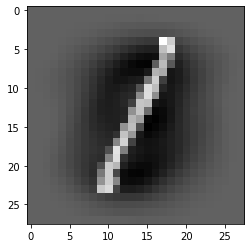

In [52]:
plt.imshow(X_[65].reshape((28,28)),cmap="gray")

## Sklearn PCA

In [53]:
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=2)  #n_components represts the no of final components required

In [55]:
Z_pca = pca.fit_transform(X_)

In [59]:
pca.explained_variance_   
# explaining the variance of data 42+28=70 so the new components represt 70% spread/variance of original data

array([42.34445302, 28.78019082])

## Custom PCA

#### Step 2 - Calcuate Covariance matrix

In [67]:
covar = np.dot(X_.T,X_)  ## Easily computed from normalized vector

##### Step 3 - Compute eigon vectors

In [70]:
U,S,v = np.linalg.svd(covar)

In [79]:
Ured = U[:,:2]

#### Step 4 -Projection og data on new axis

In [87]:
Z = np.dot(X_,Ured)

In [90]:
Z,Z_pca

(array([[-20.75950494,   0.72291633],
        [  1.57713259,  -4.47021078],
        [  6.84737225,  -1.85700248],
        ...,
        [ -0.51599232,  -6.88288518],
        [ -2.25356852,   4.29087713],
        [  4.79549684,  -1.51368956]]),
 array([[20.7594893 , -0.72309828],
        [-1.57718372,  4.46986816],
        [-6.84743015,  1.85648791],
        ...,
        [ 0.51593502,  6.88246211],
        [ 2.2535211 , -4.29165414],
        [-4.79546163,  1.51432702]]))

##### Obtained z is mirror image of z_pca as it is a direction only I got correct results 

## Visualizing the data

In [95]:
new_dataset = np.hstack((Z,y_test.reshape((-1,1))))

In [96]:
df = pd.DataFrame(new_dataset,columns=["PC1","PC2","Label"])

In [98]:
df.corr()

,PC1,PC2,Label
PC1,1.000000e+00,8.151569e-17,0.298304
PC2,8.151569e-17,1.000000e+00,-0.250402
Label,2.983036e-01,-2.504018e-01,1.000000


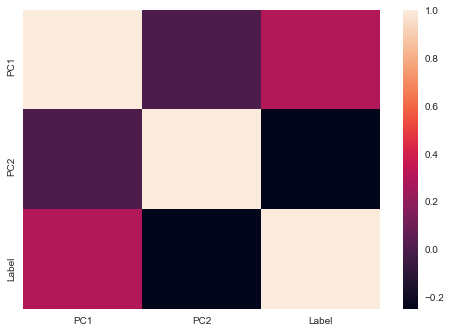

In [102]:
plt.style.use("seaborn")
sns.heatmap(df.corr())
plt.show()

[]

<Figure size 1080x1080 with 0 Axes>

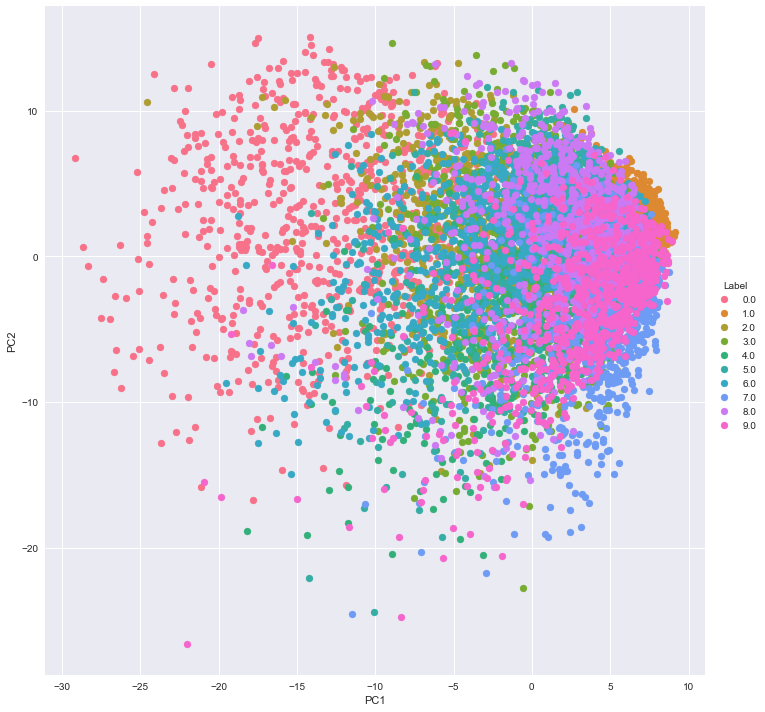

In [108]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(df,hue="Label",height=10)
fg.map(plt.scatter,"PC1","PC2")
fg.add_legend()
plt.plot()

In [130]:
pca = PCA()

In [131]:
Z_pca = pca.fit_transform(X_)

In [132]:
pca.explained_variance_ratio_

array([6.34773793e-02, 4.31435755e-02, 3.95054655e-02, 3.12513193e-02,
       2.80674239e-02, 2.41425718e-02, 2.04777861e-02, 1.85438415e-02,
       1.64674868e-02, 1.56681247e-02, 1.46387326e-02, 1.32448154e-02,
       1.22806177e-02, 1.16945814e-02, 1.10961677e-02, 1.07594146e-02,
       1.03210469e-02, 1.00399554e-02, 9.79733872e-03, 9.55734989e-03,
       9.28482147e-03, 8.81960544e-03, 8.39275333e-03, 8.09559151e-03,
       7.88341023e-03, 7.74938692e-03, 7.45524118e-03, 7.22865437e-03,
       7.06967461e-03, 6.78994114e-03, 6.61009489e-03, 6.56256155e-03,
       6.15740169e-03, 6.15021549e-03, 6.07277340e-03, 5.92271591e-03,
       5.79574927e-03, 5.74400723e-03, 5.61560081e-03, 5.40949196e-03,
       5.31020339e-03, 5.19633092e-03, 5.10934871e-03, 5.05668415e-03,
       4.85153518e-03, 4.82225508e-03, 4.72774957e-03, 4.64495507e-03,
       4.57573196e-03, 4.55964644e-03, 4.50841650e-03, 4.37813494e-03,
       4.34636364e-03, 4.28386136e-03, 4.25817683e-03, 4.12849030e-03,
      

In [133]:
pca.explained_variance_

array([4.23444530e+01, 2.87801911e+01, 2.63532828e+01, 2.08471118e+01,
       1.87232007e+01, 1.61050127e+01, 1.36603096e+01, 1.23702149e+01,
       1.09851215e+01, 1.04518834e+01, 9.76519716e+00, 8.83534367e+00,
       8.19214729e+00, 7.80121448e+00, 7.40202506e+00, 7.17738396e+00,
       6.88495793e+00, 6.69744755e+00, 6.53560297e+00, 6.37551137e+00,
       6.19371327e+00, 5.88337723e+00, 5.59863298e+00, 5.40040244e+00,
       5.25886068e+00, 5.16945649e+00, 4.97323792e+00, 4.82208652e+00,
       4.71603440e+00, 4.52942996e+00, 4.40945823e+00, 4.37774972e+00,
       4.10747591e+00, 4.10268214e+00, 4.05102212e+00, 3.95092186e+00,
       3.86622503e+00, 3.83170898e+00, 3.74605170e+00, 3.60856073e+00,
       3.54232737e+00, 3.46636539e+00, 3.40834134e+00, 3.37320990e+00,
       3.23635925e+00, 3.21682710e+00, 3.15378441e+00, 3.09855391e+00,
       3.05237660e+00, 3.04164628e+00, 3.00747184e+00, 2.92056369e+00,
       2.89936971e+00, 2.85767572e+00, 2.84054211e+00, 2.75403089e+00,
      

In [134]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

In [135]:
cum_var_explained

array([0.06347738, 0.10662095, 0.14612642, 0.17737774, 0.20544516,
       0.22958774, 0.25006552, 0.26860936, 0.28507685, 0.30074497,
       0.31538371, 0.32862852, 0.34090914, 0.35260372, 0.36369989,
       0.3744593 , 0.38478035, 0.39482031, 0.40461764, 0.41417499,
       0.42345982, 0.43227942, 0.44067217, 0.44876777, 0.45665118,
       0.46440056, 0.4718558 , 0.47908446, 0.48615413, 0.49294407,
       0.49955417, 0.50611673, 0.51227413, 0.51842435, 0.52449712,
       0.53041984, 0.53621559, 0.54195959, 0.5475752 , 0.55298469,
       0.55829489, 0.56349122, 0.56860057, 0.57365725, 0.57850879,
       0.58333104, 0.58805879, 0.59270375, 0.59727948, 0.60183913,
       0.60634754, 0.61072568, 0.61507204, 0.6193559 , 0.62361408,
       0.62774257, 0.6318552 , 0.63585004, 0.63982043, 0.64372412,
       0.64752457, 0.65129542, 0.6550191 , 0.6586944 , 0.66226677,
       0.66577782, 0.66923881, 0.6726613 , 0.67607033, 0.67943552,
       0.68277469, 0.68607155, 0.68929833, 0.69251472, 0.69568

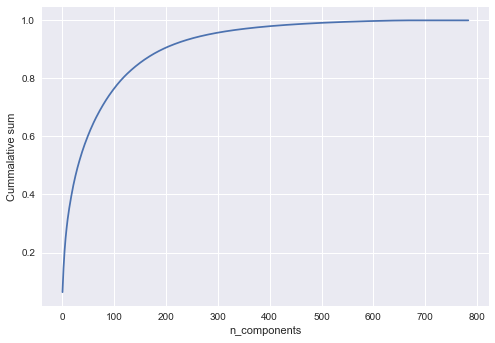

In [138]:
plt.plot(cum_var_explained)
plt.xlabel("n_components")
plt.ylabel("Cummalative sum")
plt.show()